# Machine Learning

Two main types: supervised learning and unsupervised learning.

Supervised learning involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is deter‐ mined, it can be used to apply labels to new, unknown data.

Unsupervised learning involves modeling the features of a dataset without reference to any label, and is often described as “letting the dataset speak for itself.”



Supervised learning
    
    Models that can predict labels based on labeled training data

Classifcation
    
    Models that predict labels as two or more discrete categories

Regression
    
    Models that predict continuous labels

Unsupervised learning
    
    Models that identify structure in unlabeled data

Clustering
    
    Models that detect and identify distinct groups in the data

Dimensionality reduction
    
    Models that detect and identify lower-dimensional structure in higher- dimensional data

## General Overview

In [198]:
#each row of the data refers to a single observed flower
import seaborn as sns
iris = sns.load_dataset('iris') 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


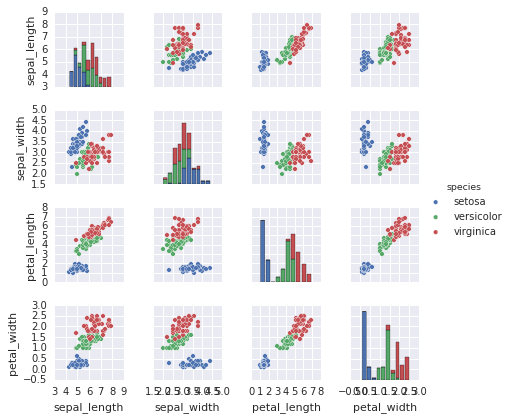

In [199]:
%matplotlib inline
import seaborn as sns; sns.set() 
sns.pairplot(iris, hue='species', size=1.5);

In [200]:
#Extract the feature Matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [201]:
y_iris = iris['species']
y_iris.shape

(150,)

In [202]:
#Gaussian naive Bayes
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [203]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [204]:
#Get the accuracy Score
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.97368421052631582

In [205]:
#Unsupervised learning example: Iris dimensionality
# The task of dimensionality reduction is to ask whether there is a suitable lower- dimensional representation that retains the essential features of the data.

from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions




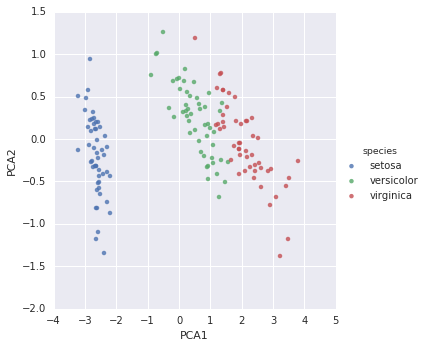

In [206]:

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [207]:
#Now cluster it
# Gaussian mixture model (GMM)
from sklearn.mixture import GMM # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

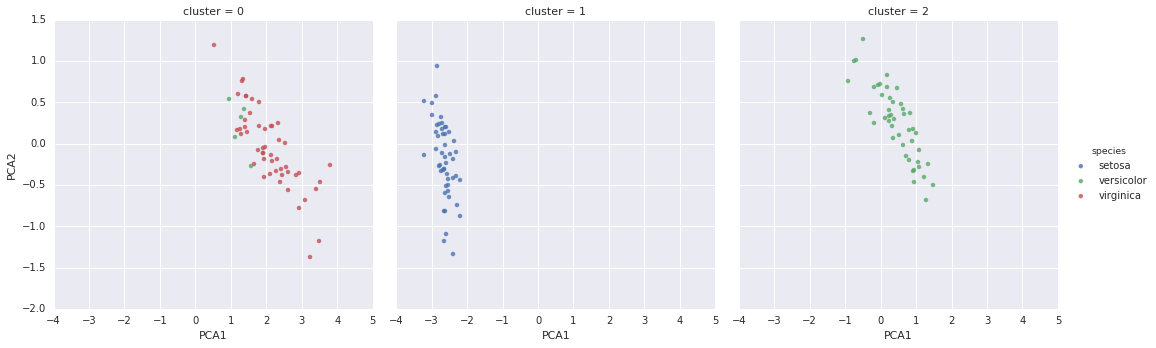

In [208]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
               col='cluster', fit_reg=False);

## Application: Exploring Handwritten Digits

In [209]:
#The images data is a three-dimensional array: 1,797 samples, each consisting of an 8×8 grid of pixels. Let’s visualize the first hundred of these 
from sklearn.datasets import load_digits 
digits = load_digits()
digits.images.shape

(1797, 8, 8)

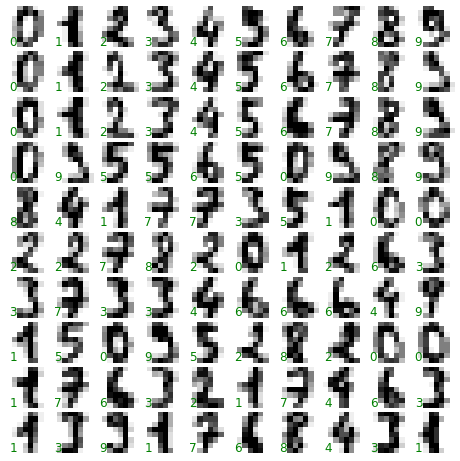

In [210]:
import matplotlib.pyplot as plt
        
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                     subplot_kw={'xticks':[], 'yticks':[]},
                                     gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(digits.target[i]),
                        transform=ax.transAxes, color='green')

In [211]:
X = digits.data
X.shape

(1797, 64)

In [212]:
y = digits.target
y.shape

(1797,)

Unsupervised learning: Dimensionality reduction
We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead we’ll reduce the dimensions to 2, using an unsupervised method. 

In [213]:


#Transform the data into 2 demensions
from sklearn.manifold import Isomap 
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

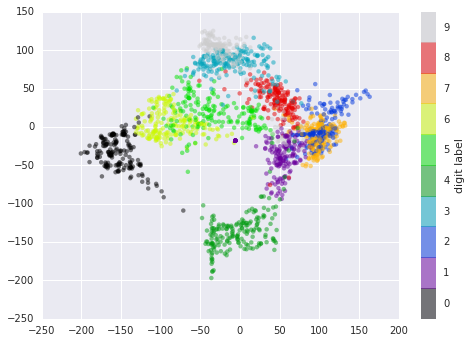

In [214]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
                        edgecolor='none', alpha=0.5,
                        cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [215]:
#Classi cation on digits

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [216]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [217]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.83333333333333337

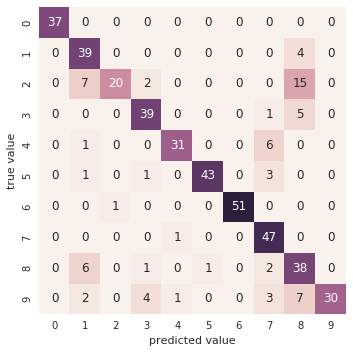

In [218]:
#How to find out where you went wrong, use a confusion matrix:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

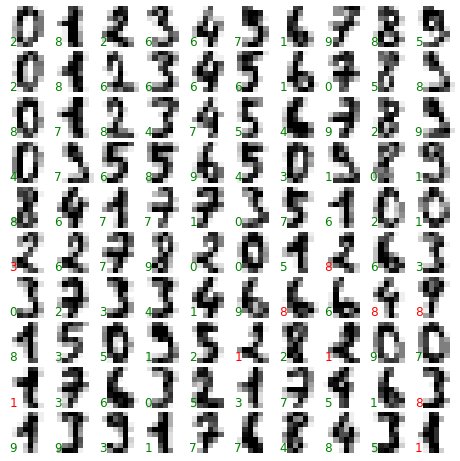

In [219]:
#Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                     subplot_kw={'xticks':[], 'yticks':[]},
                                     gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest') 
    ax.text(0.05, 0.05, str(y_model[i]),
        transform=ax.transAxes,
        color='green' if (ytest[i] == y_model[i]) else 'red')

## Feature Engineering

In [220]:
# Categorical Features

data = [
               {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
               {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
               {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
               {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [221]:
#use one-hot encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0
from sklearn.feature_extraction import DictVectorizer 
vec = DictVectorizer(sparse=False, dtype=int) 
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [222]:
#Notice ^ that the neighborhood column has been expanded into three separate columns, representing the three neighborhood labels

#To see the meaning of each column, you can inspect the feature names:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

## Text Features

In [223]:
#Another common need in feature engineering is to convert text to a set of representa‐ tive numerical values. For example, most automatic mining of social media data relies on some form of encoding the text as numbers. 
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [224]:
#For a vectorization of this data based on word count, we could construct a column representing the word “problem,” the word “evil,” the word “horizon,” and so on.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<type 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [225]:
#The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [226]:
#There are some issues with this approach, One approach to fix this is known as term frequency–inverse document frequency (TF–IDF), which weights the word counts by a measure of how often they appear in the documents.
from sklearn.feature_extraction.text import TfidfVectorizer 
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())



,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Imputation of Missing Data

In [227]:
#Another common need in feature engineering is handling missing data.

#When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value.

from numpy import nan
import numpy as np
X=np.array([[nan,0, 3],
            [3, 7, 9 ], 
            [3, 5, 2 ], 
            [4, nan,6 ], 
            [8, 8, 1 ]])
y = np.array([14, 16, -1,  8, -5])

In [228]:
#We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. 

from sklearn.preprocessing import Imputer 
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [229]:
# This imputed data can then be fed directly into, for example, a LinearRegression estimator
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X2, y)
model.predict(X2)


array([ 13.14869292,  14.3784627 ,  -1.15539732,  10.96606197,  -5.33782027])

## Feature Pipelines

With any of the preceding examples, it can quickly become tedious to do the transfor‐ mations by hand, especially if you wish to string together multiple steps. For example, we might want a processing pipeline that looks something like this:

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

To streamline this type of processing pipeline, Scikit-Learn provides a pipeline object, which can be used as follows:

In [230]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(Imputer(strategy='mean'),
                        PolynomialFeatures(degree=2),
LinearRegression())

In [231]:
#This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the
#specified steps to any input data.

model.fit(X, y) # X with missing values, from above 
print(y)
print(model.predict(X))

#All the steps of the model are applied automatically. 

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


## In Depth: Naive Bayes Classifcation

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and- dirty baseline for a classification problem. 

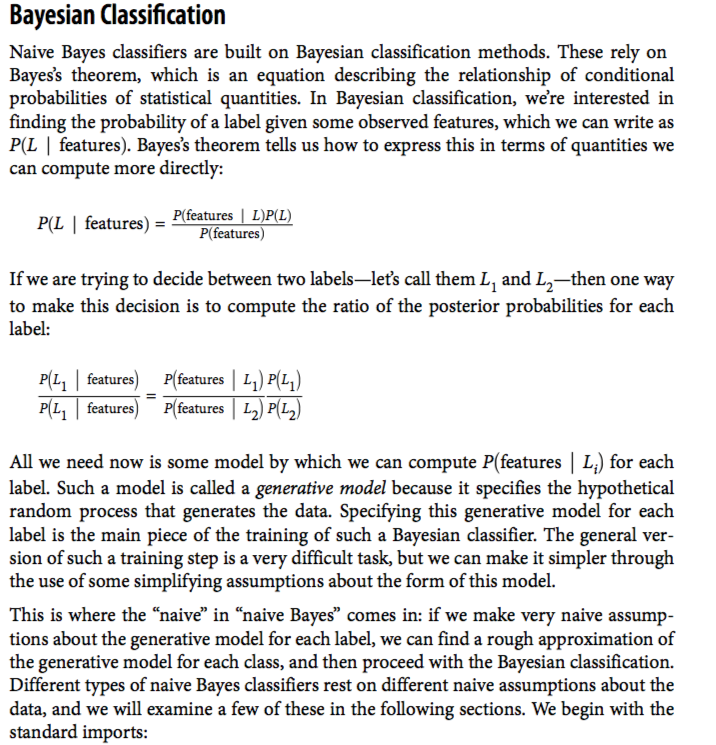

In [232]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaus‐ sian distribution.

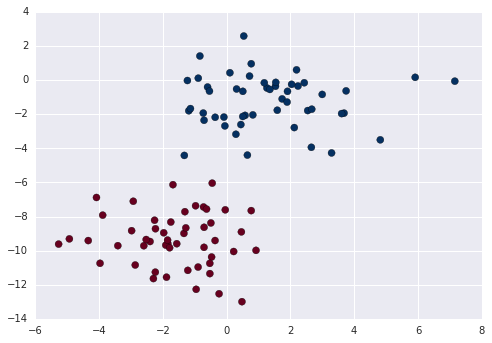

In [233]:
# Imagine that you have the following data:

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. We can fit this model by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. 

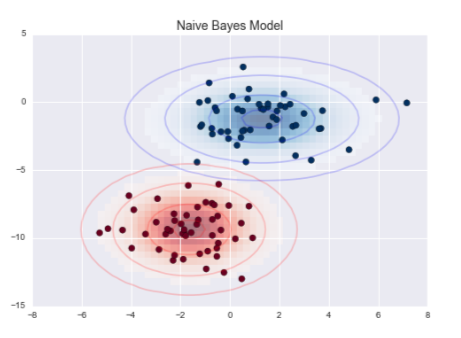

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood P (features | L1)   for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.
This procedure is implemented in Scikit-Learn’s sklearn.naive_bayes.GaussianNB estimator:

In [234]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X, y);

In [235]:
# Now let’s generate some new data and predict the label:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

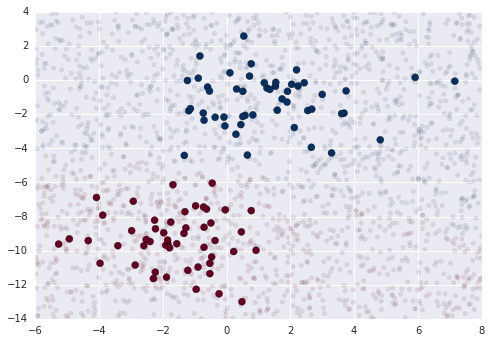

In [236]:
#Now we can plot this new data to get an idea of where the decision boundary is
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method:

In [237]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

### Multinomial Naive Bayes

Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.



Example: Classifying text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.


we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

In [238]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [239]:
#For simplicity, we will select just a few of these categories, and download the training and testing set:

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
                  'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [240]:
#Here is a representative entry from the data:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the con‐ tent of each string into a vector of numbers. For this we will use the TF–IDF vector‐ izer and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [242]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [243]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data

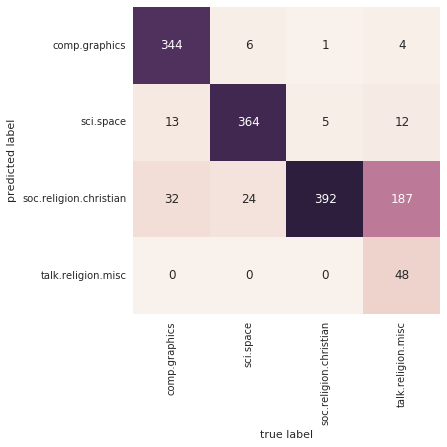

In [244]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Chris‐ tianity. This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Here’s a quick utility func‐ tion that will return the prediction for a single string:

In [245]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [246]:
#Test it out
predict_category('sending a payload to the ISS')

'sci.space'

In [247]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [248]:
predict_category('determining the screen resolution')

'comp.graphics'

### When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

• They are extremely fast for both training and prediction
• They provide straightforward probabilistic prediction
• They are often very easily interpretable
• They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

• When the naive assumptions actually match the data (very rare in practice)
• For very well-separated categories, when model complexity is less important
• For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

### In Depth: Linear Regression

Linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit very quickly, and are very interpretable. You are probably familiar with the sim‐ plest form of a linear regression model (i.e., fitting a straight line to data), but such models can be extended to model more complicated data behavior.

In [249]:
#Standard Import

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
import numpy as np


#### Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form y = ax + b where a is commonly known as the slope, and b is commonly known as the intercept.



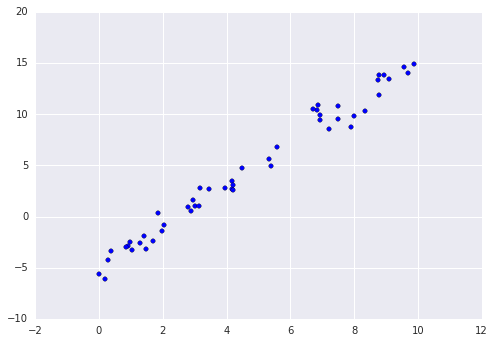

In [250]:
# Data

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y=2*x-5+rng.randn(50) 
plt.scatter(x, y);

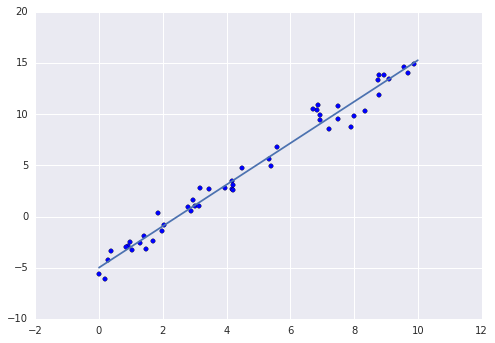

In [251]:
#We can use Scikit-Learn’s LinearRegression estimator to fit this data and construct the best-fit line 

from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [252]:
print("Model slope: ", model.coef_[0]) 
print("Model intercept:", model.intercept_)

('Model slope: ', 2.0272088103606953)
('Model intercept:', -4.9985770855532037)


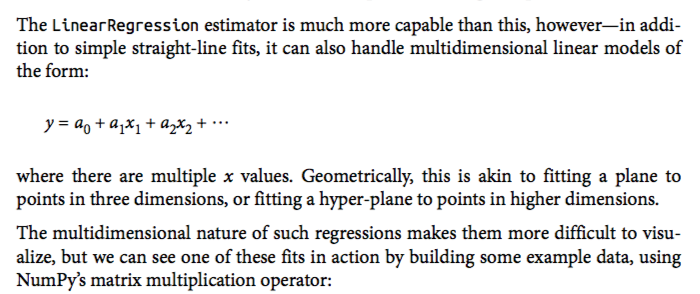

In [253]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y) 
print(model.intercept_) 
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


Here the y data is constructed from three random x values, and the linear regression recovers the coefficients used to construct the data.

### Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. The idea is to take our multidimensional linear model:

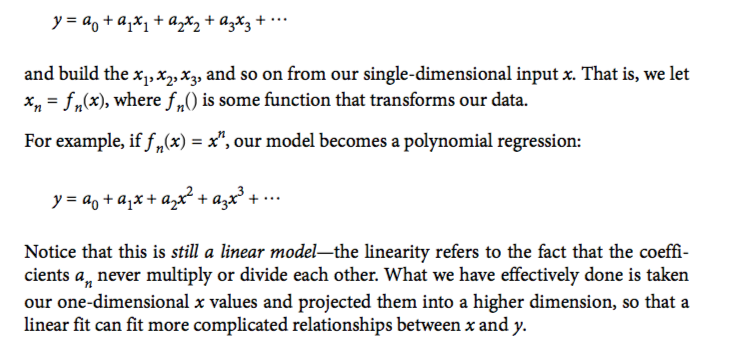

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the PolynomialFeatures transformer:

In [254]:
from sklearn.preprocessing import PolynomialFeatures 
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher- dimensional data representation can then be plugged into a linear regression.

The cleanest way to accomplish this is to use a pipeline. Let’s make a 7th-degree polynomial model in this way:

In [255]:
from sklearn.pipeline import make_pipeline 
poly_model = make_pipeline(PolynomialFeatures(7),
                            LinearRegression())

With this transform in place, we can use the linear model to fit much more compli‐ cated relationships between x and y. For example, here is a sine wave with noise

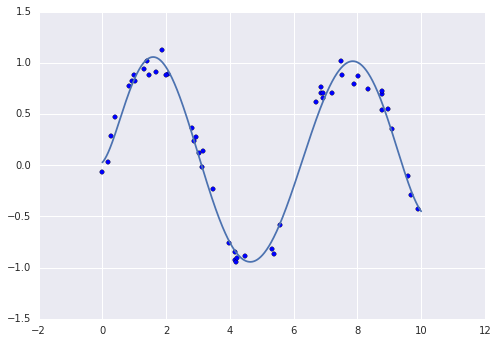

In [256]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

#Our linear model, through the use of 7th-order polynomial basis functions, can pro‐ vide an excellent fit to this nonlinear data!

### Gaussian basis functions

Other basis functions are possible. For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases. The result might look something like

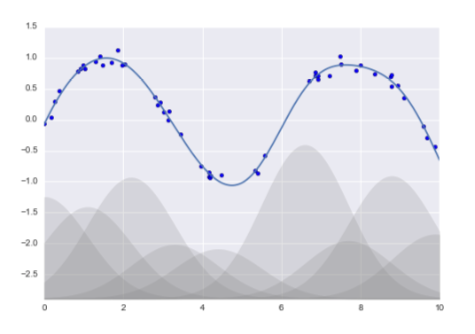

The shaded regions in the plot shown in Figure 5-45 are the scaled basis functions, and when added together they reproduce the smooth curve through the data. These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them. #395

### Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to overfitting. For example, if we choose too many Gaussian basis functions, we end up with results that don’t look so good.

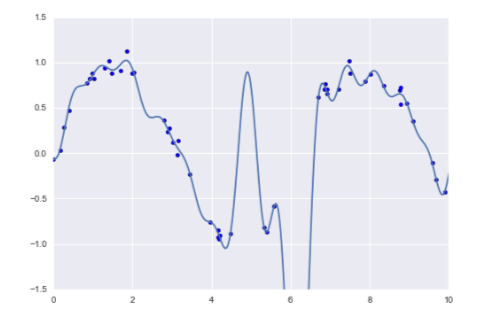

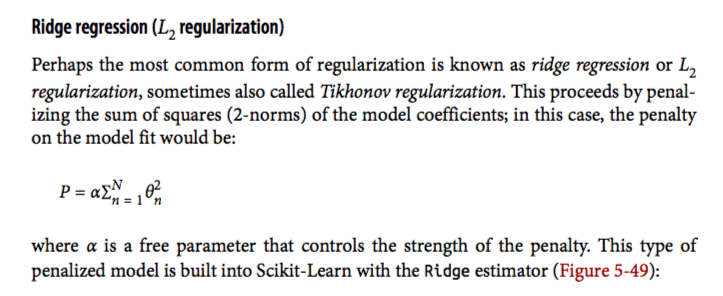

### Support Vector Machines

Here we will consider instead discriminative classi cation: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated 

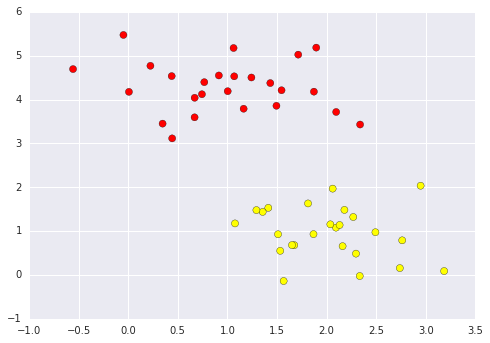

In [257]:
from sklearn.datasets.samples_generator import make_blobs 
X, y = make_blobs(n_samples=50, centers=2,
                             random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two-dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discrimi‐ nate between the two classes!

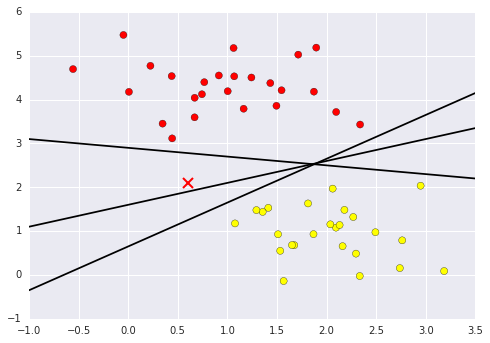

In [258]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
        plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look

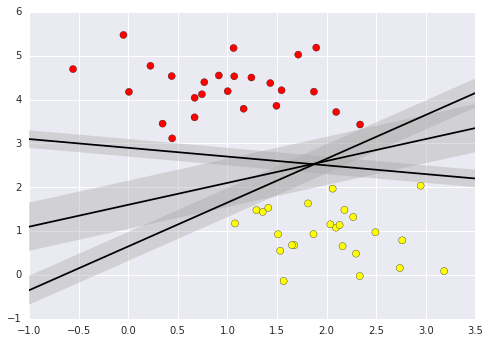

In [259]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit=m*xfit+b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a max‐ imum margin estimator.

#### Fitting a support vector machine

Let’s see the result of an actual fit to this data: we will use Scikit-Learn’s support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number (we’ll discuss the meaning of these in more depth momentarily):

In [260]:
from sklearn.svm import SVC # "Support vector classifier" 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [261]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support: 
        ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

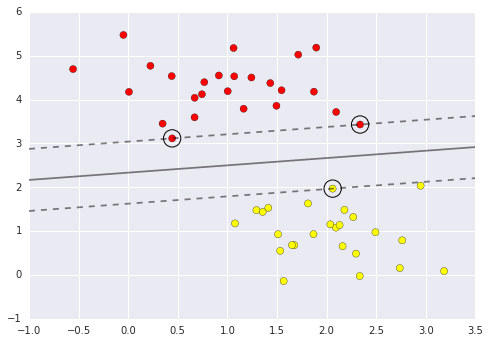

In [262]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin; they are indicated by the black circles. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points is stored in the support_vectors_ attribute of the classifier:

In [263]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

#### Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with kernels.

we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.
In SVM models, we can use a version of the same idea. To motivate the need for ker‐ nels, let’s look at some data that is not linearly separable

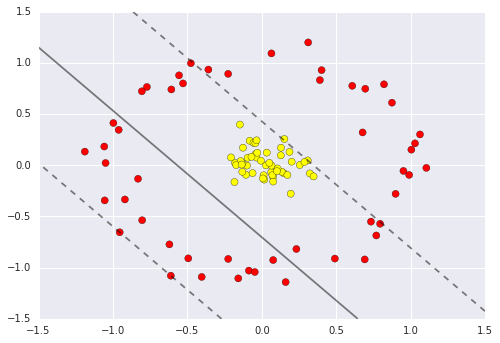

In [264]:
from sklearn.datasets.samples_generator import make_circles 
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will ever be able to separate this data. Think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump:

In [265]:
r = np.exp(-(X ** 2).sum(1))

We can visualize this extra data dimension using a three-dimensional plot—if you are running this notebook live, you will be able to use the sliders to rotate the plot

In [266]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn') 
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    


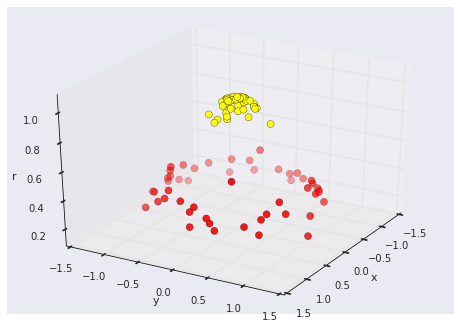

In [267]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[70, 30], azip=(-180, 180),
                     X=fixed(X), y=fixed(y));

Here we had to choose and carefully tune our projection; if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity rela‐ tionship (or kernel) between each pair of points.

A potential problem with this strategy—projecting N points into N dimensions—is that it might become very computationally intensive as N grows large. However, because of a neat little procedure known as the kernel trick, a fit on kernel- transformed data can be done implicitly—that is, without ever building the full N- dimensional representation of the kernel projection! This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.
In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter

In [268]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

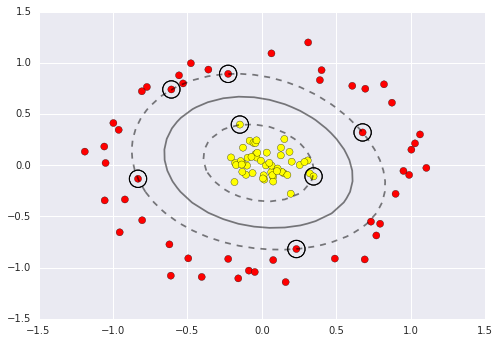

In [269]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
    s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

#### Tuning the SVM: Softening margins

Our discussion so far has centered on very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this

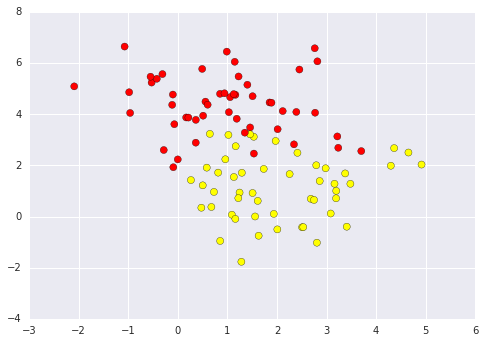

In [270]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

To handle this case, the SVM implementation has a bit of a fudge-factor that “softens” the margin; that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

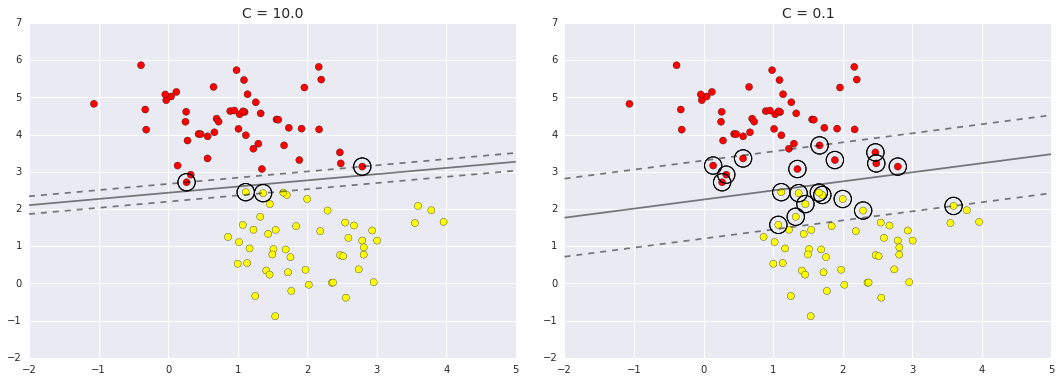

In [271]:
#visual picture of how a changing C parameter affects the final fit, via the softening of the margin:

X, y = make_blobs(n_samples=100, centers=2,
                              random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [272]:
#Example: Face Recognition
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


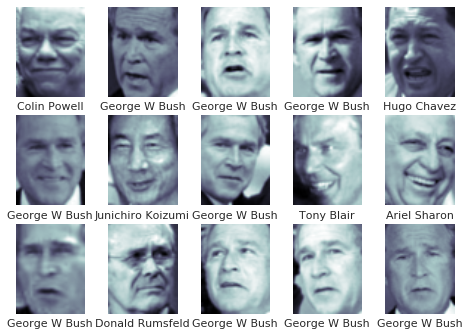

In [273]:
# Let’s plot a few of these faces to see what we’re working with
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal com‐ ponent analysis to extract 150 fundamental components to feed into our support vector machine classi‐ fier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [274]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA 
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [275]:
#For the sake of testing our classifier output, we will split the data into a training and testing set:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                            random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parame‐ ters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [276]:
from sklearn.grid_search import GridSearchCV 
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain) 
print(grid.best_params_)

CPU times: user 1min 9s, sys: 4min 4s, total: 5min 13s
Wall time: 1min 8s
{'svc__gamma': 0.005, 'svc__C': 1}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [277]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

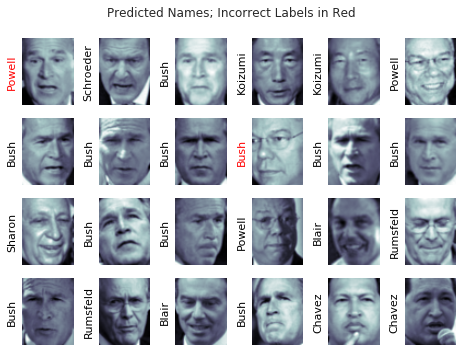

In [278]:
#Let’s take a look at a few of the test images along with their predicted values
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                       color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [279]:
#lists recovery statistics label by label:
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.67      0.71        15
     Colin Powell       0.81      0.82      0.82        68
  Donald Rumsfeld       0.89      0.81      0.85        31
    George W Bush       0.86      0.95      0.91       126
Gerhard Schroeder       0.83      0.83      0.83        23
      Hugo Chavez       1.00      0.70      0.82        20
Junichiro Koizumi       1.00      0.75      0.86        12
       Tony Blair       0.90      0.90      0.90        42

      avg / total       0.87      0.86      0.86       337



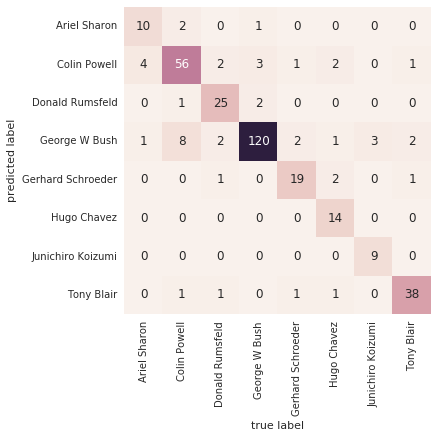

In [280]:
# We might also display the confusion matrix between these classes
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#This helps us get a sense of which labels are likely to be confused by the estimator.

#For a real-world facial recognition task, in which the photos do not come precropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation.  For this kind of application, one good option is to make use of OpenCV

### Summary for Support Vector Machine

We have seen here a brief intuitive introduction to the principals behind support vec‐ tor machines. These methods are a powerful classification method for a number of reasons:

• Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.

• Once the model is trained, the prediction phase is very fast.

• Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.

• Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

• The scaling with the number of samples N is   N3   at worst, or   N2   for effi‐ cient implementations. For large numbers of training samples, this computa‐ tional cost can be prohibitive.

• The results are strongly dependent on a suitable choice for the softening parame‐ ter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.

• The results do not have a direct probabilistic interpretation. This can be estima‐ ted via an internal cross-validation (see the probability parameter of SVC), but this extra estimation is costly.

## Decision Trees and Random Forests

Here we’ll take a look at motivating another powerful algorithm—a non‐ parametric algorithm called random forests. Random forests are an example of an ensemble method, a method that relies on aggregating the results of an ensemble of simpler estimators. The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts; that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting! We will see examples of this in the following sections. We begin with the stan‐ dard imports:

In [281]:
#Standard Imports
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

#### Motivating Random Forests: Decision Trees

Random forests are an example of an ensemble learner built on decision trees. For this reason we’ll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown

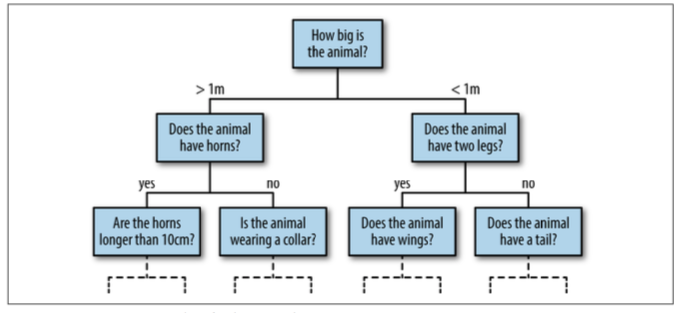

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrow‐ ing the options even among a large number of classes. The trick, of course, comes in deciding which questions to ask at each step. In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data; that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.

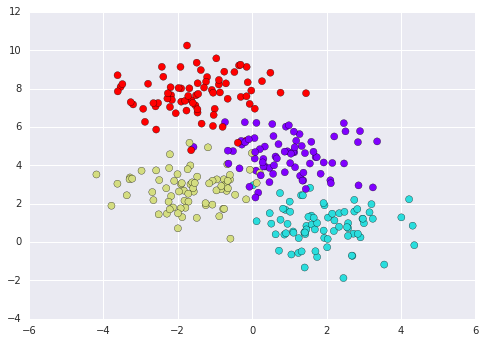

In [282]:
# Creating a decision tree - Consider the following two-dimensional data, which has one of four class labels

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. A visualization of the first four levels of a decision tree classifier for this data.

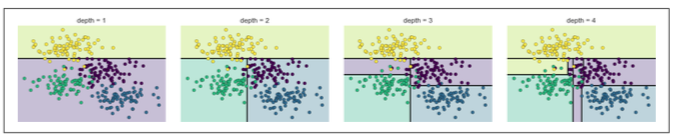

Notice that after the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch. Except for nodes that contain all of one color, at each level every region is again split along one of the two features.

This process of fitting a decision tree to our data can be done in Scikit-Learn with the DecisionTreeClassifier estimator:

In [283]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier().fit(X, y)

In [284]:
# Let’s write a quick utility function to help us visualize the output of the classifier:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'): 
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
            clim=(y.min(), y.max()), zorder=3)
    
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

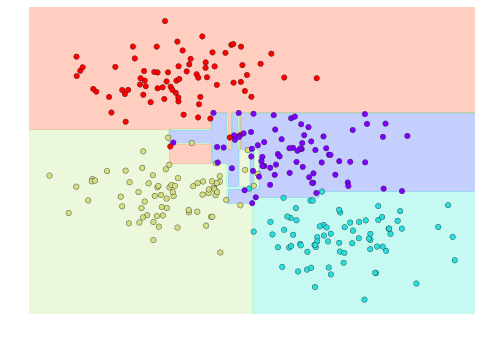

In [285]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions. It’s clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise prop‐ erties of the data. That is, this decision tree, even at only five levels deep, is clearly overfitting our data.

#### Decision trees and overfitting

Such overfitting turns out to be a general property of decision trees; it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. Another way to see this overfitting is to look at models trained on different subsets of the data—for example, in Figure 5-72 we train two different trees, each on half of the original data.

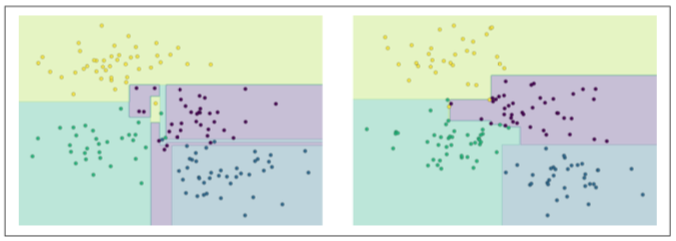

It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters). The key observation is that the incon‐ sistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result!

#### Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bag‐ ging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

We can do this type of bagging classification manually using Scikit-Learn’s Bagging Classifier meta-estimator as shown here 

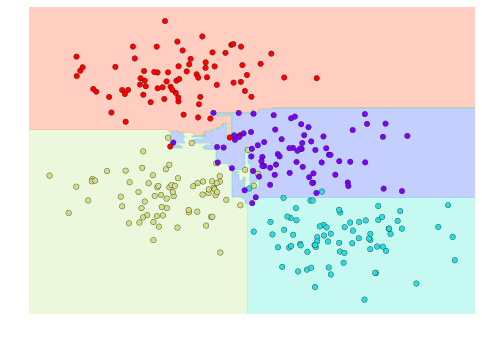

In [286]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
        
        
bag.fit(X,y)
visualize_classifier(bag,X,y)

In this example, we have randomized the data by fitting each estimator with a ran‐ dom subset of 80% of the training points. In practice, decision trees are more effec‐ tively randomized when some stochasticity is injected in how the splits are chosen; this way, all the data contributes to the fit each time, but the results of the fit still have the desired randomness. For example, when determining which feature to split on, the randomized tree might select from among the top several features. You can read more technical details about these randomization strategies in the Scikit-Learn docu‐ mentation (http://scikit-learn.org/stable/modules/ensemble.html#forest) and references within.

In Scikit-Learn, such an optimized ensemble of randomized decision trees is imple‐ mented in the RandomForestClassifier estimator, which takes care of all the ran‐ domization automatically. All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees

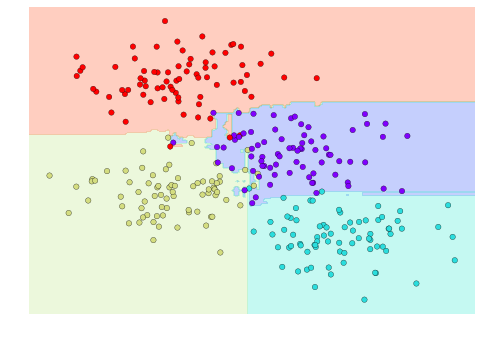

In [287]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

#### Random Forest Regression

In the previous section we considered random forests within the context of classifica‐ tion. Random forests can also be made to work in the case of regression (that is, con‐ tinuous rather than categorical variables). The estimator to use for this is the RandomForestRegressor, and the syntax is very similar to what we saw earlier.

Consider the following data, drawn from the combination of a fast and slow oscilla‐ tion 

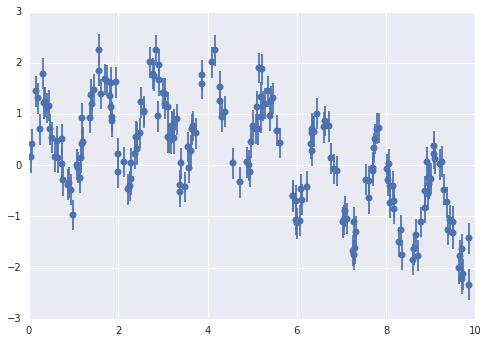

In [288]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3): 
    fast_oscillation = np.sin(5 * x) 
    slow_oscillation = np.sin(0.5 * x) 
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Using the random forest regressor, we can find the best-fit curve as follows

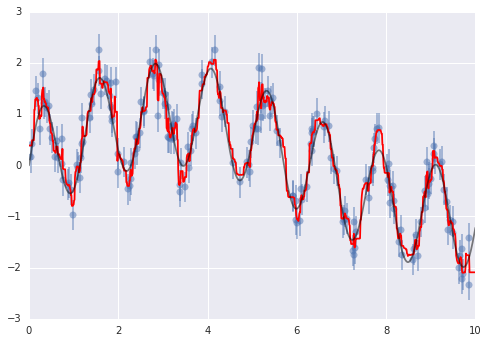

In [289]:
from sklearn.ensemble import RandomForestRegressor 
forest = RandomForestRegressor(200) 
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Here the true model is shown by the smooth curve, while the random forest model is shown by the jagged curve. As you can see, the nonparametric random forest model is flexible enough to fit the multiperiod data, without us needing to specify a multi‐ period model!

#### Example: Random Forest for Classifying Digits

In [290]:
from sklearn.datasets import load_digits 
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

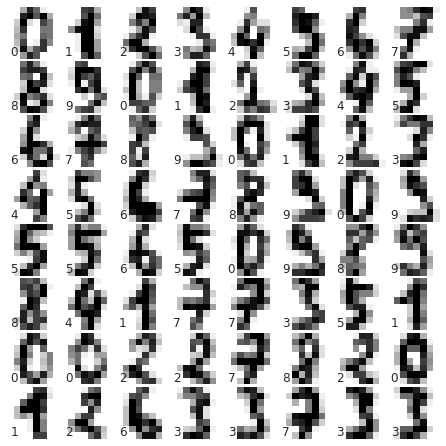

In [291]:
#To remind us what we’re looking at, we’ll visualize the first few data points

# set up the figure
fig = plt.figure(figsize=(6, 6)) 
# figure size in inches 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) 
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

     # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [292]:
#We can quickly classify the digits using a random forest as follows
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                    random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)


In [293]:
#We can take a look at the classification report for this classifier:
from sklearn import metrics 
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



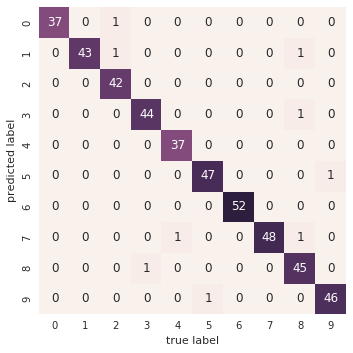

In [294]:
#And for good measure, plot the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


#### Summary of Random Forests

This section contained a brief introduction to the concept of ensemble estimators, and in particular the random forest model—an ensemble of randomized decision trees. Random forests are a powerful method with several advantages:

• Both training and prediction are very fast, because of the simplicity of the under‐ lying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.

• The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the predict_proba() method).

• The nonparametric model is extremely flexible, and can thus perform well on tasks that are underfit by other estimators.

A primary disadvantage of random forests is that the results are not easily interpreta‐ ble; that is, if you would like to draw conclusions about the meaning of the classifica‐ tion model, random forests may not be the best choice.
